In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import chi2
from ..passive_model import FactorDynamicBasketModel
from statsmodels.tools.tools import add_constant

excel_file = pd.ExcelFile("./data/raw_M.xlsx")
excel_pd = excel_file._parse_excel("daily_data").set_index("Date")
answer = pd.read_excel("./data/answer.xlsx", "performance")
"""
twd_vix = pd.read_excel("./vix_tw.xlsx", "vix").set_index("Date")
currency_vix = pd.read_excel("./currency_vix.xlsx").set_index("Date")
meta_setup = {"figsize":(20, 10), "grid": True}
data = excel_pd.loc[excel_pd.index >= pd.to_datetime("1999-01-01")]
daily_return = data.pct_change()
answer = answer.dropna()[:-1]
all_vix = pd.concat([twd_vix, currency_vix], 1)
all_vix = all_vix.loc[all_vix.index >= pd.to_datetime("1999-01-01")].shift(1)
sigma_vix = ['VIX Index  (R2)'] +[col for col in all_vix.columns if "V1M" in col]
"""

'\ntwd_vix = pd.read_excel("./vix_tw.xlsx", "vix").set_index("Date")\ncurrency_vix = pd.read_excel("./currency_vix.xlsx").set_index("Date")\nmeta_setup = {"figsize":(20, 10), "grid": True}\ndata = excel_pd.loc[excel_pd.index >= pd.to_datetime("1999-01-01")]\ndaily_return = data.pct_change()\nanswer = answer.dropna()[:-1]\nall_vix = pd.concat([twd_vix, currency_vix], 1)\nall_vix = all_vix.loc[all_vix.index >= pd.to_datetime("1999-01-01")].shift(1)\nsigma_vix = [\'VIX Index  (R2)\'] +[col for col in all_vix.columns if "V1M" in col]\n'

In [ ]:
risk_factor

In [6]:
data = excel_pd.loc[excel_pd.index >= pd.to_datetime("1999-01-01")]
daily_return = data.pct_change()

workdays = daily_return.index
first_workday_of_month = []
for i in range(1, len(workdays)):
    if workdays[i].month - workdays[i-1].month > 0:
        first_workday_of_month.append(workdays[i])
    elif workdays[i].month == 1 and workdays[i].month - workdays[i-1].month < 0:
        first_workday_of_month.append(workdays[i])
        
x_base_cncy = ["AUD", "XEU", "GBP"]
portfolio = ["JPY", "AUD", "KRW", "XEU", "SGD", "GBP"]
for asset in portfolio:
    if asset in x_base_cncy:
        data.loc[:, asset] = 1./data.loc[:, asset]

C:\Users\i6800309\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [7]:
first_workday_of_month = pd.Index(first_workday_of_month)
montly_price = data.loc[first_workday_of_month[first_workday_of_month > pd.to_datetime("2002-02-11")]]
monthly_return = montly_price.pct_change().dropna()

In [2]:
raw_monthly = pd.read_excel("./data/raw_M.xlsx", "raw_monthly_data")

In [8]:
raw_monthly['USD'].plot(**meta_setup)

NameError: name 'meta_setup' is not defined

In [17]:
montly_price["USD"].plot(**meta_setup)

NameError: name 'montly_price' is not defined

In [7]:
montly_price.head()

USD     JPY       AUD      KRW       XEU     SGD       GBP
2002-03-01  35.103  133.73  1.934236  1324.60  1.152074  1.8315  0.703928
2002-04-01  35.002  133.29  1.871257  1325.05  1.144558  1.8458  0.700574
2002-05-01  34.717  128.44  1.863586  1288.75  1.110124  1.8135  0.686059
2002-06-03  34.139  124.07  1.761804  1226.40  1.073077  1.7873  0.686436
2002-07-01  33.568  119.93  1.782849  1203.90  1.010203  1.7663  0.653168

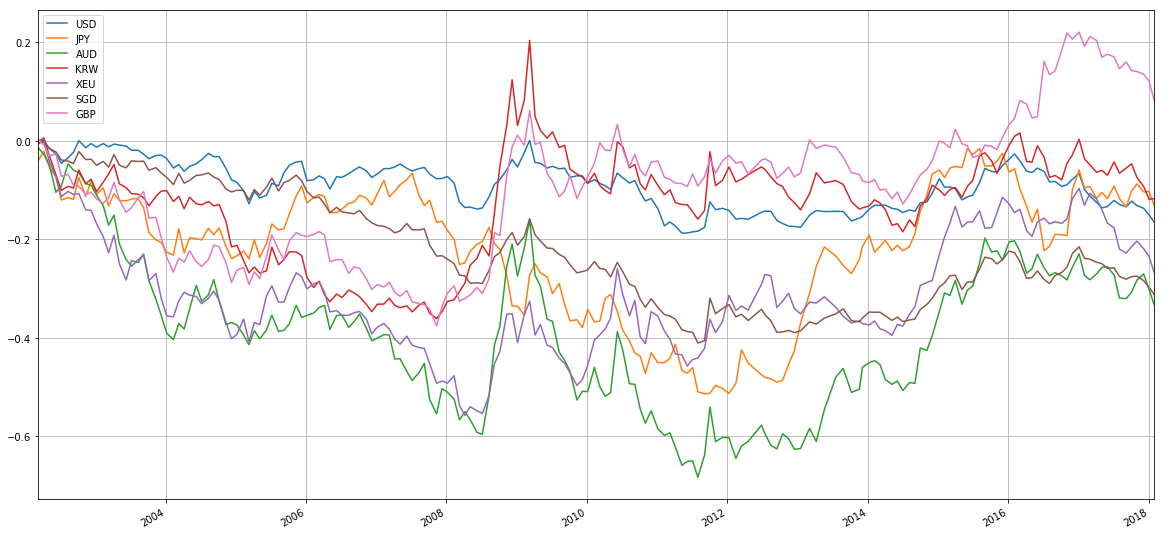

In [8]:
raw_monthly.pct_change().dropna().cumsum().plot(**meta_setup)

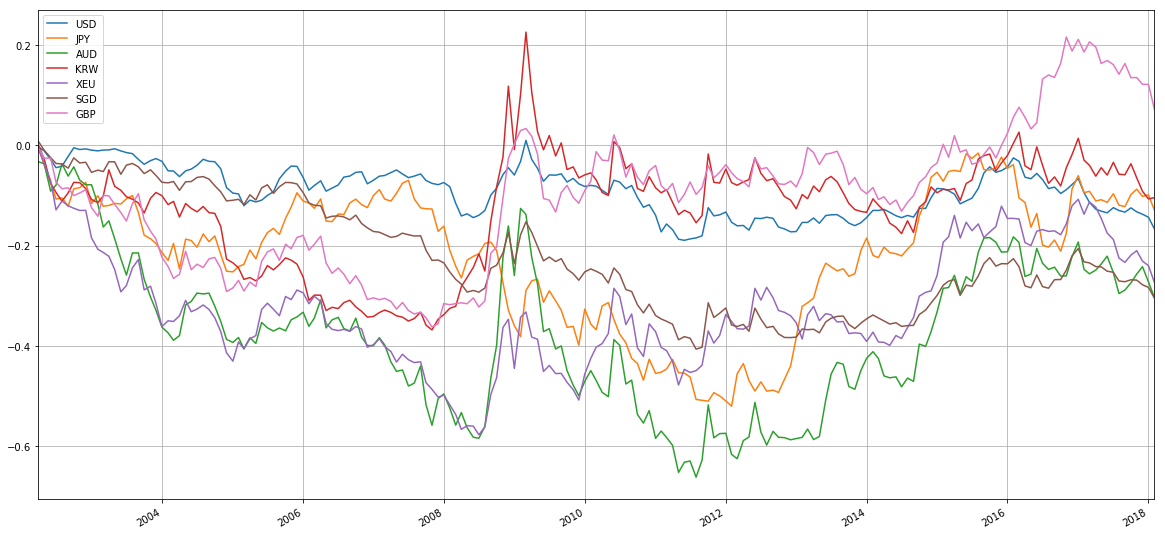

In [9]:
monthly_return.cumsum().plot(**meta_setup)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D747D68>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000CDBF550>]], dtype=object)

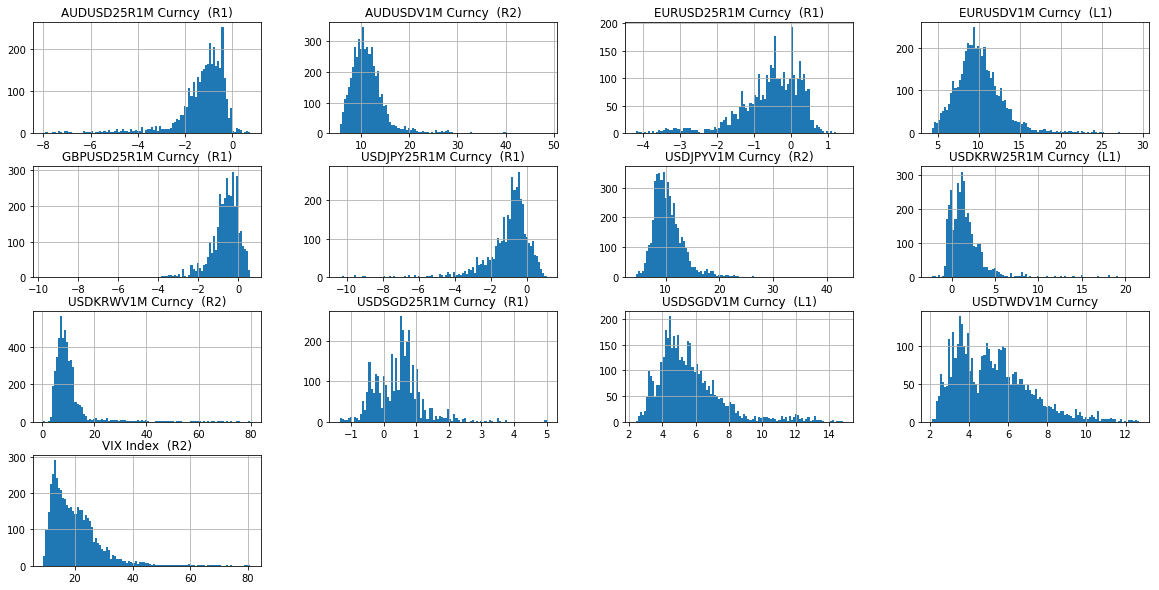

In [10]:
# transform the VIX into normal dis
sigma_vix = ['VIX Index  (R2)'] +[col for col in all_vix.columns if "V1M" in col]
all_vix.hist(bins=100, figsize=(20, 10))

In [11]:
f = all_vix[sigma_vix].dropna()

def chi2normal_transformation(df):
    risk_factor = pd.DataFrame(chi2.cdf(df, pd.rolling_mean(df, 150)), columns=df.columns, index=df.index)
    risk_factor = (risk_factor - pd.expanding_mean(risk_factor))
    return risk_factor

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=150,center=False).mean()
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:872: RuntimeWarning: invalid value encountered in greater
  cond = logical_and(cond, (asarray(arg) > 0))
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.expanding_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.expanding(min_periods=1).mean()
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CEFBB00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000106FADA0>]], dtype=object)

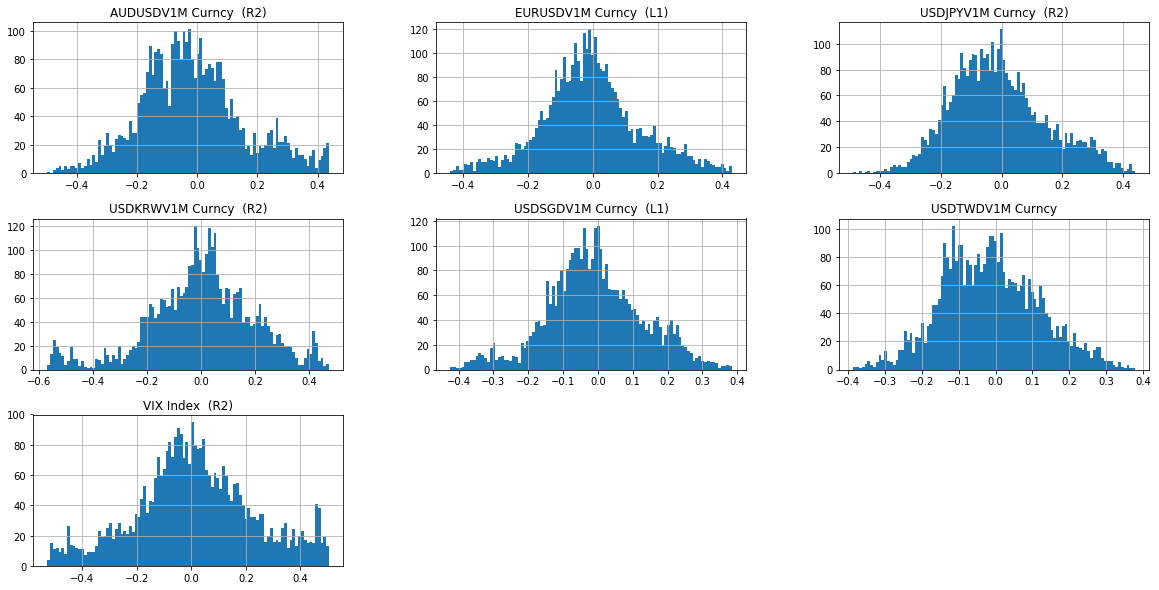

In [12]:
risk_factor = chi2normal_transformation(f)
risk_factor.hist(bins=100, **meta_setup)

In [13]:
def normalize(batch):
    return (batch - pd.expanding_mean(batch))/pd.expanding_std(batch)

In [40]:
# test the FactorDynamicBasketModel
from model.passive_model import BasketModel
initial_size = 50
portfolio = ["JPY", "AUD", "KRW", "XEU", "SGD", "GBP"]

agent = BasketModel(target="USD", 
                    portfolio=portfolio)
raw_monthly_return = raw_monthly.pct_change().dropna()
proxy = monthly_return[portfolio]
target = monthly_return[agent._target]
target_proxy = pd.concat([target, proxy], 1).dropna()
agent.train(target_proxy[agent._target], target_proxy.drop(agent._target, 1), method="OLS")
z =  1 + np.sum(agent.weights)
print(agent.weights/z, 1/z)
print(proxy.columns)

JPY    0.036355
AUD    0.005608
KRW    0.101123
XEU   -0.015074
SGD    0.198295
GBP    0.033583
dtype: float64 0.6401102966266702
Index(['JPY', 'AUD', 'KRW', 'XEU', 'SGD', 'GBP'], dtype='object')


In [41]:
print('R2: ', agent.fitted_model['result'].summary())

R2:                              WLS Regression Results                            
Dep. Variable:                    USD   R-squared:                       0.630
Model:                            WLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     52.49
Date:                Thu, 08 Feb 2018   Prob (F-statistic):           2.06e-37
Time:                        10:59:14   Log-Likelihood:                 637.45
No. Observations:                 191   AIC:                            -1263.
Df Residuals:                     185   BIC:                            -1243.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
JPY            0.0568      0.025      2.239    

In [42]:
def exp_dynamic_weights(intial_window, portfolio, factor_maps, factors, proxy, target, returns):
    agent = FactorDynamicBasketModel(target="USD", 
                                     portfolio=portfolio, 
                                     factor_maps=factor_maps)
    proxy_list = agent.making_features(portfolio_returns=proxy, factors=factors)
    target_proxy = pd.concat([returns, proxy_list], 1).dropna()
    res = agent.train(target_proxy[agent._target], target_proxy.drop(agent._target, 1), method="OLS")
    print(pd.DataFrame(agent.weights, index=target_proxy.columns[1:]))
    dynamic_weights = agent.dynamic_weights(factors.loc[target_proxy.index])
    z = dynamic_weights.sum(1) + 1
    pd.rolling_mean(dynamic_weights.divide(z, 0), 4).plot(**meta_setup)
    dynamic_weights.divide(z, 0).plot(**meta_setup)
    res = {"agent": agent,
          "dynamic_weights": dynamic_weights,
          "target_proxy": target_proxy}
    return res

In [45]:
res['dynamic_weights'].to_excel('./weights_hist/dynamic_weights.xls')

In [57]:
res['dynamic_weights'].asfreq("D").dropna().index

DatetimeIndex(['2003-08-01', '2003-09-01', '2003-10-01', '2003-11-03',
               '2003-12-01', '2004-01-01', '2004-02-02', '2004-03-01',
               '2004-04-01', '2004-05-03',
               ...
               '2017-02-01', '2017-03-01', '2017-04-03', '2017-05-01',
               '2017-06-01', '2017-07-03', '2017-08-01', '2017-09-01',
               '2017-10-02', '2017-11-01'],
              dtype='datetime64[ns]', length=169, freq=None)

                                       0
JPY                             0.061092
AUD                            -0.020089
KRW                             0.172934
XEU                             0.000611
SGD                             0.361781
GBP                             0.045037
JPY dot VIX Index  (R2)        -0.135677
JPY dot USDJPYV1M Curncy  (R2) -0.020996
JPY dot USDTWDV1M Curncy        0.308536
AUD dot VIX Index  (R2)         0.434561
AUD dot AUDUSDV1M Curncy  (R2) -0.064389
AUD dot USDTWDV1M Curncy        0.396611
KRW dot VIX Index  (R2)        -0.028302
KRW dot USDKRWV1M Curncy  (R2) -0.080054
KRW dot USDTWDV1M Curncy       -0.856140
XEU dot VIX Index  (R2)        -0.149645
XEU dot EURUSDV1M Curncy  (L1) -0.747158
XEU dot USDTWDV1M Curncy        0.208177
SGD dot VIX Index  (R2)        -0.502542
SGD dot USDSGDV1M Curncy  (L1)  0.142372
SGD dot USDTWDV1M Curncy        1.445762
GBP dot VIX Index  (R2)        -0.187359
GBP dot USDTWDV1M Curncy        0.349441


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=4,center=False).mean()
  # This is added back by InteractiveShellApp.init_path()


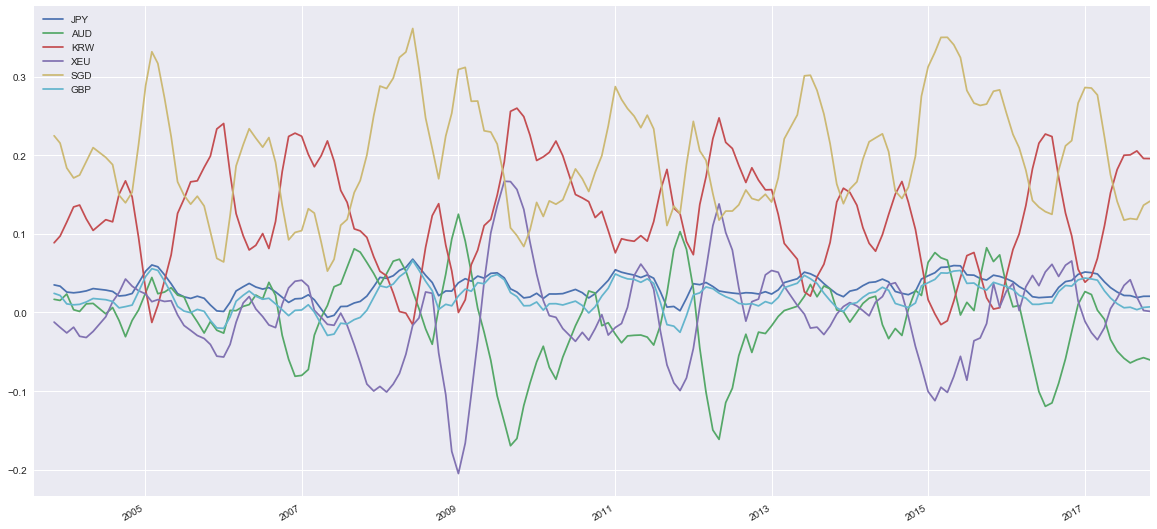

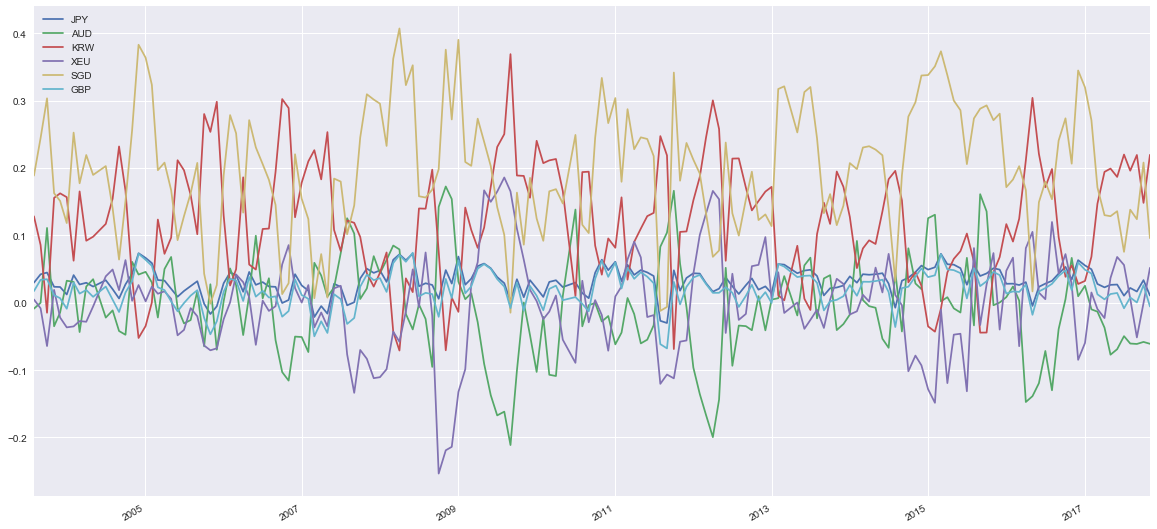

In [50]:
portfolio = ["JPY", "AUD", "KRW", "XEU", "SGD", "GBP"]
factor_maps = { 
    "JPY": ['VIX Index  (R2)', 'USDJPYV1M Curncy  (R2)', 'USDTWDV1M Curncy'],
    "AUD": ['VIX Index  (R2)', 'AUDUSDV1M Curncy  (R2)', 'USDTWDV1M Curncy'],
    "KRW": ['VIX Index  (R2)', 'USDKRWV1M Curncy  (R2)', 'USDTWDV1M Curncy'],
    "XEU": ['VIX Index  (R2)', 'EURUSDV1M Curncy  (L1)', 'USDTWDV1M Curncy'],
    "SGD": ['VIX Index  (R2)', 'USDSGDV1M Curncy  (L1)', 'USDTWDV1M Curncy'],
    "GBP": ['VIX Index  (R2)', 'USDTWDV1M Curncy']
                }
factors = risk_factor.loc[first_workday_of_month]
res = exp_dynamic_weights(intial_window=10, portfolio=portfolio, factor_maps=factor_maps, proxy=monthly_return[portfolio], 
                    target=monthly_return["USD"], factors=factors, returns=monthly_return)

In [34]:
print('R2: ', res['agent'].fitted_model["result"].summary())

R2:                              WLS Regression Results                            
Dep. Variable:                    USD   R-squared:                       0.706
Model:                            WLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     26.38
Date:                Wed, 07 Feb 2018   Prob (F-statistic):           6.01e-34
Time:                        17:50:32   Log-Likelihood:                 580.05
No. Observations:                 169   AIC:                            -1130.
Df Residuals:                     154   BIC:                            -1083.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const  

                                       0
JPY                             0.065025
AUD                             0.005139
KRW                             0.177208
XEU                             0.009061
SGD                             0.276539
GBP                             0.043129
JPY dot USDTWDV1M Curncy        0.325384
JPY dot VIX Index  (R2)        -0.203819
AUD dot VIX Index  (R2)         0.282990
KRW dot USDTWDV1M Curncy       -0.829551
XEU dot VIX Index  (R2)        -0.301559
XEU dot EURUSDV1M Curncy  (L1) -0.742612
XEU dot USDTWDV1M Curncy        0.718238
SGD dot USDTWDV1M Curncy        1.297604


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=4,center=False).mean()
  # This is added back by InteractiveShellApp.init_path()


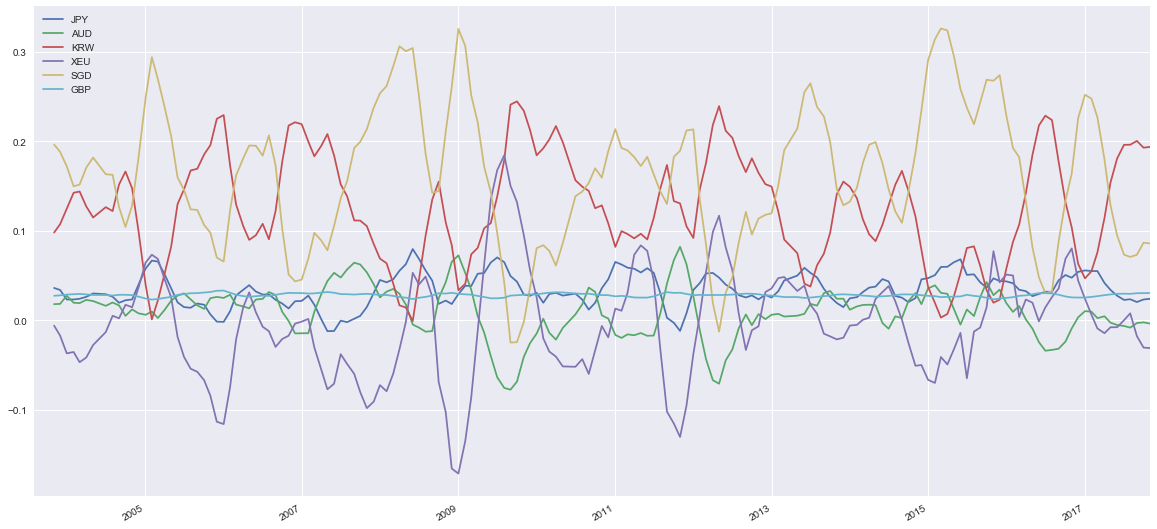

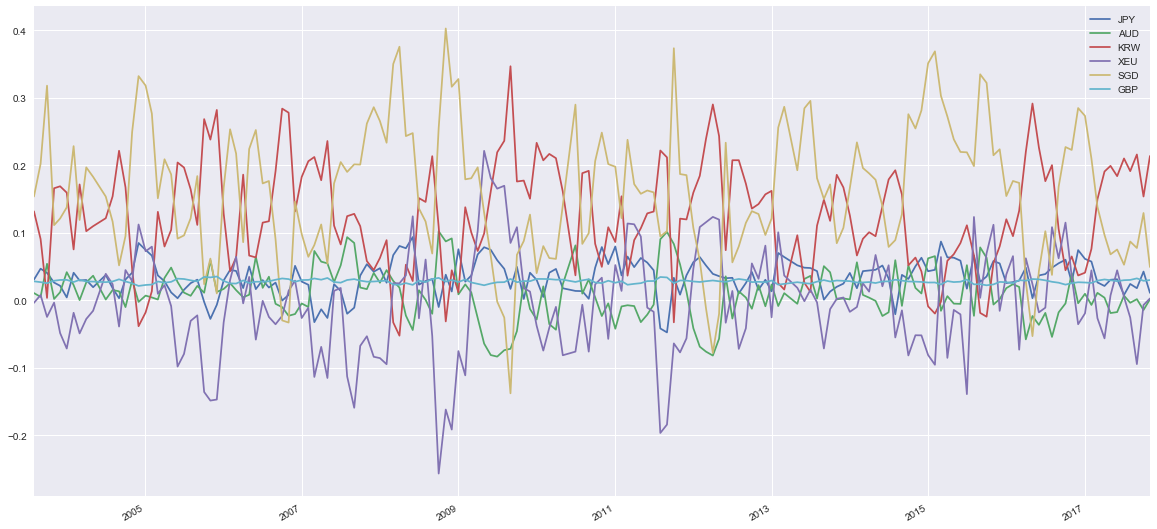

In [36]:
select_factor_maps = { 
    "JPY": ['USDTWDV1M Curncy', 'VIX Index  (R2)'],
    "AUD": ['VIX Index  (R2)'],
    "KRW": ['USDTWDV1M Curncy'],
    "XEU": ['VIX Index  (R2)', 'EURUSDV1M Curncy  (L1)', 'USDTWDV1M Curncy'],
    "SGD": ['USDTWDV1M Curncy']
                }
factors = risk_factor.loc[first_workday_of_month]
res = exp_dynamic_weights(intial_window=10, portfolio=portfolio, factor_maps=select_factor_maps, proxy=monthly_return[portfolio], 
                    target=monthly_return["USD"], factors=factors, returns=monthly_return)

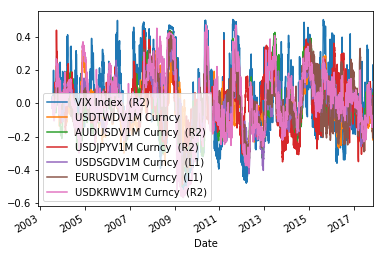

In [20]:
risk_factor.plot()

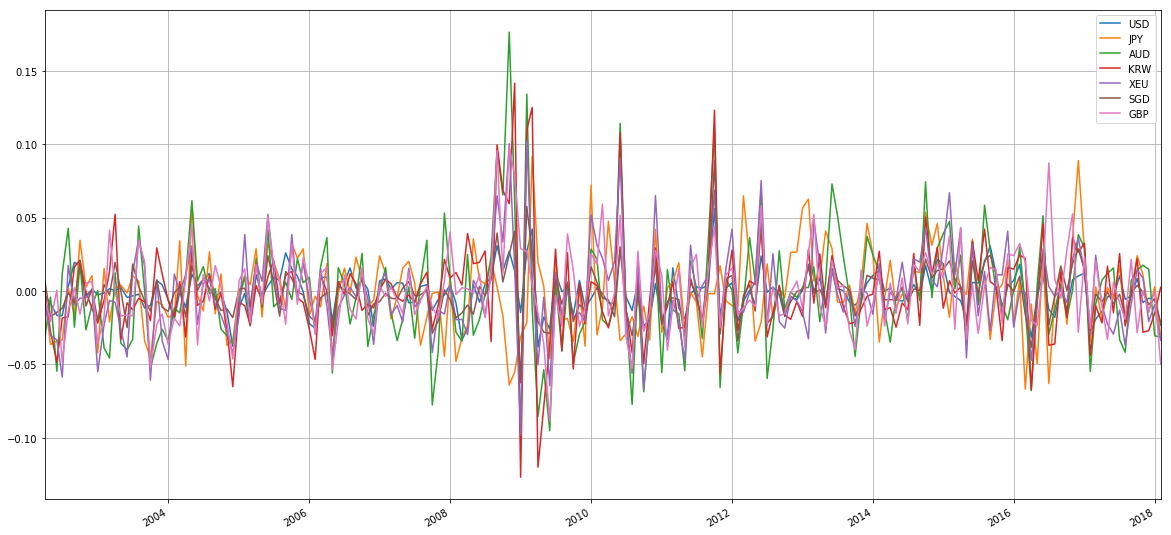

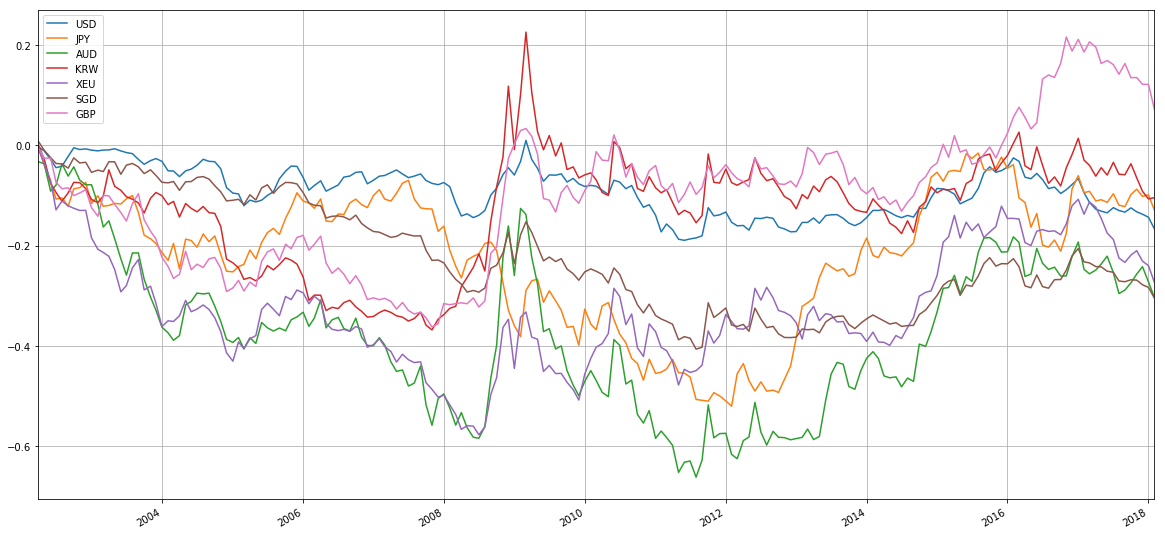

In [21]:
monthly_return.plot(**meta_setup)
monthly_return.cumsum().plot(figsize=(20, 10), grid=True)

In [22]:
# test the FactorDynamicBasketModel
from model.passive_model import FactorDynamicBasketModel
initial_size = 50

portfolio = ["JPY", "AUD", "KRW", "XEU", "SGD", "GBP"]
factor_maps = { 
    "JPY": ['VIX Index  (R2)', 'USDJPYV1M Curncy  (R2)'],
    "AUD": ['VIX Index  (R2)', 'AUDUSDV1M Curncy  (R2)'],
    "KRW": ['VIX Index  (R2)', 'USDKRWV1M Curncy  (R2)'],
    "XEU": ['VIX Index  (R2)', 'EURUSDV1M Curncy  (L1)'],
    "SGD": ['VIX Index  (R2)', 'USDSGDV1M Curncy  (L1)'],
    "GBP": ['VIX Index  (R2)']
              }

agent = FactorDynamicBasketModel(target="USD", 
                                 portfolio=portfolio, factor_maps=factor_maps)
proxy = daily_return[portfolio]
proxy_list = agent.making_features(portfolio_returns=proxy, factors=all_vix)
target_proxy = pd.concat([daily_return, proxy_list], 1).dropna()
res = agent.train(target_proxy[agent._target], target_proxy.drop(agent._target, 1))
print(agent.weights)
print(target_proxy.columns[1:])

JPY                               0.040431
AUD                              -0.038102
KRW                               0.236566
XEU                               0.049284
SGD                               0.201298
GBP                              -0.009286
JPY dot VIX Index  (R2)          -0.002173
JPY dot USDJPYV1M Curncy  (R2)    0.002480
AUD dot VIX Index  (R2)           0.000857
AUD dot AUDUSDV1M Curncy  (R2)    0.000945
KRW dot VIX Index  (R2)          -0.004083
KRW dot USDKRWV1M Curncy  (R2)    0.001417
XEU dot VIX Index  (R2)          -0.003816
XEU dot EURUSDV1M Curncy  (L1)    0.002811
SGD dot VIX Index  (R2)           0.001161
SGD dot USDSGDV1M Curncy  (L1)   -0.009399
GBP dot VIX Index  (R2)          -0.000194
dtype: float64
Index(['JPY', 'AUD', 'KRW', 'XEU', 'SGD', 'GBP', 'JPY dot VIX Index  (R2)',
       'JPY dot USDJPYV1M Curncy  (R2)', 'AUD dot VIX Index  (R2)',
       'AUD dot AUDUSDV1M Curncy  (R2)', 'KRW dot VIX Index  (R2)',
       'KRW dot USDKRWV1M Curncy  (R2)', '

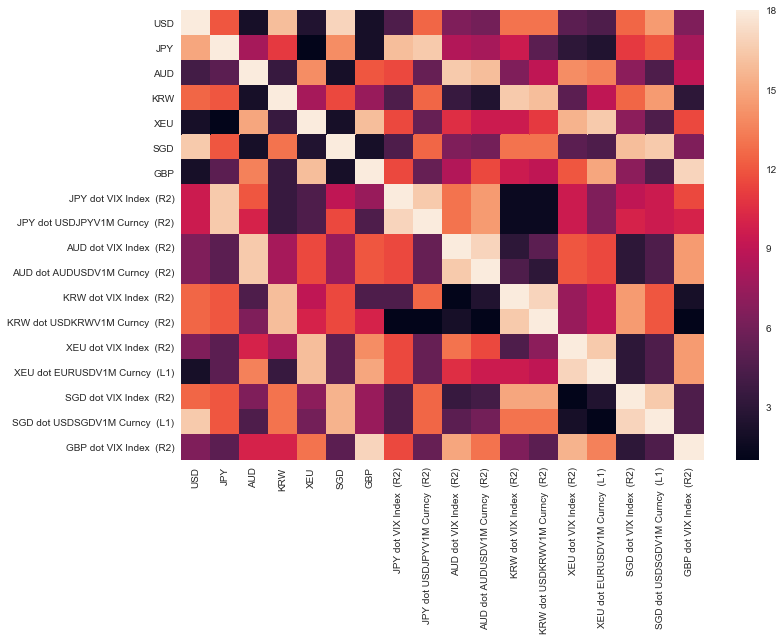

In [23]:
import numpy as np; np.random.seed(0)
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(target_proxy.corr().rank(1).rank(0))

In [24]:
#whole batch estimate
from model.passive_model import BasketModel
initial_size = 50
agent = BasketModel(target="USD", 
                    portfolio=["JPY", "AUD", "KRW", 
                               "XEU", "SGD", "GBP"])

rewards = []
weighs = []
monthly_return.dropna(inplace=True)
for step in range(monthly_return.shape[0]-initial_size):
    batch = monthly_return.iloc[:step+initial_size]
    agent.train(batch[agent._target], batch[agent._portfolio])
    weighs.append(agent._weights)
    new_state = monthly_return.iloc[step+initial_size]
    # new_state = new_state.iloc[-1]
    proxy = agent.act(new_state[agent._portfolio])
    target = new_state[agent._target]
    r = (- proxy + target)
    rewards.append(r)

In [25]:
# dynamic estimate the correlation matrix
from model.passive_model import BasketModel
initial_size = 50
agent = BasketModel(target="USD", 
                    portfolio=["JPY", "AUD", "KRW", 
                               "XEU", "SGD", "GBP"])

time_index = []
rewards_dy = []
weighs_dy = []
for step in range(initial_size, monthly_return.shape[0]):
    # prepare data
    batch = monthly_return.iloc[step-initial_size:step]
    agent.train(batch[agent._target], batch[agent._portfolio])
    weighs_dy.append(agent._weights)
    
    new_state = daily_return.iloc[step]
    # new_state = new_state.iloc[-1]
    proxy = agent.act(new_state[agent._portfolio])
    target = new_state[agent._target]
    time_index.append(monthly_return.index[step])
    r = agent.reward(target, proxy, agent._weights)
    rewards_dy.append(r)

In [26]:
def plot_result():
    fig = plt.figure(figsize=(15, 5))
    ax = fig.add_subplot(111)
    plt.plot(time_index, np.cumsum(rewards_dy), label='Accumulated return(dynamics)')
    #plt.plot(time_index, rewards_dy, label='Monthly Return(dynamics)')
    #plt.plot(time_index, np.ones_like(rewards_dy)*np.mean(rewards_dy), label='Average return(dynamics)')
    # ax.annotate("{}".format(np.mean(rewards_dy)), xy=(-1, np.mean(rewards_dy)))
    plt.plot(time_index, np.cumsum(rewards), label='Accumulated return')
    plt.plot(answer.index[40:], np.cumsum(answer['total'].iloc[40:]), label='Original Accumulated return')
    #plt.plot(time_index, rewards, label='Monthly Return')
    #plt.plot(time_index, np.ones_like(rewards)*np.mean(rewards),
    #       label='Average return')
    plt.plot(answer.index[40:], np.zeros_like(answer.index.tolist()[40:]), label="Zero")
    #ax.set_xticklabels([x.strftime('%a\n%d\n%h\n%Y') for x in time_index])
    plt.grid()
    plt.legend()
    plt.title("Accumulated Returns")
    plt.savefig('basket_result')

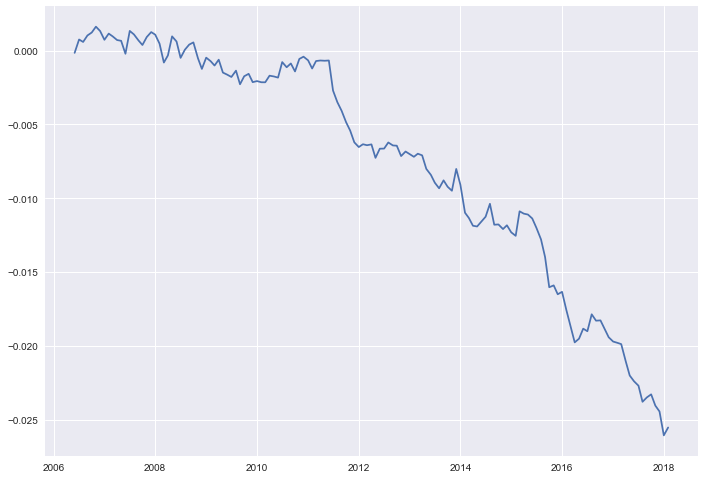

In [27]:
plt.plot(time_index, np.cumsum(rewards_dy), label='Accumulated return(dynamics)')

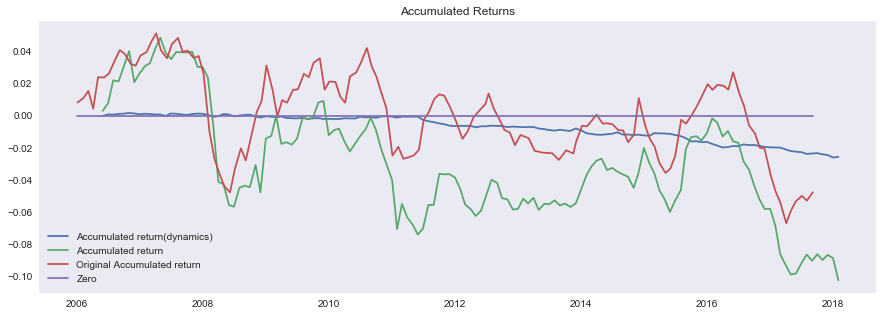

In [28]:
plot_result()

In [29]:
vix_measures = pd.DataFrame(chi2.cdf(all_vix["VIX Index  (R2)"], df=all_vix["VIX Index  (R2)"].mean()), index=all_vix.index)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1735: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0


In [97]:
# SGD, KRW, USD
corr_s = pd.rolling_corr(monthly_return[["USD", "KRW", "SGD"]], 3, center=True)
corr_s = corr_s[corr_s.index.labels[1]== 0]
corr_s.reset_index(inplace=True)
corr_s.drop("level_1", 1, inplace=True)
corr_s.set_index("level_0", inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.rolling_corr is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=3,center=True).corr(other=<DataFrame>,pairwise=True)
  


In [22]:
monthly_return

USD       JPY       AUD       KRW       XEU       SGD  \
2002-04-01 -0.002877 -0.003290 -0.032560  0.000340 -0.006524  0.007808   
2002-05-01 -0.008142 -0.036387 -0.004100 -0.027395 -0.030084 -0.017499   
2002-06-03 -0.016649 -0.034024 -0.054616 -0.048380 -0.033373 -0.014447   
2002-07-01 -0.016726 -0.033368  0.011945 -0.018346 -0.058592 -0.011750   
2002-08-01  0.002949  0.002335  0.042759 -0.017485  0.017474 -0.001189   
2002-09-02  0.019544 -0.016638 -0.024660  0.016443 -0.009368 -0.008219   
2002-10-01  0.017189  0.034599  0.018467  0.021085 -0.004965  0.020518   
2002-11-01 -0.003380  0.002535 -0.026429 -0.000529 -0.004438 -0.010193   
2002-12-02  0.001178  0.010521 -0.009439 -0.011858  0.000303  0.001415   
2003-01-01 -0.002440 -0.042050  0.000178 -0.021774 -0.055015 -0.020171   
2003-02-03 -0.001439  0.015334 -0.038863 -0.006281 -0.022736  0.004382   
2003-03-03  0.001614 -0.021077 -0.045588  0.013278 -0.006388 -0.002756   
2003-04-01  0.000259  0.001780  0.012407  0.052167 -0.007717  0.019516   
2003-05-01  0.002330  0.004062 -0.035578 -0.032868 -0.026125 -0.000113   
2003-06-02 -0.004304 -0.001264 -0.039975 -0.008064 -0.044864 -0.024905   
2003-07-01 -0.003314  0.010379 -0.032884 -0.012734  0.012809  0.018302   
2003-08-01 -0.002140  0.006598  0.044238 -0.004958  0.034934  0.003299   
2003-09-01 -0.011533 -0.033933  0.000000 -0.007389  0.016850 -0.006689   
2003-10-01 -0.009733 -0.045431 -0.052608 -0.020120 -0.060661 -0.013526   
2003-11-03  0.007253 -0.006928 -0.035613  0.029389  0.007413  0.007521   
2003-12-01  0.004173 -0.009513 -0.026015  0.011555 -0.033972 -0.011082   
2004-01-01 -0.005532 -0.017836 -0.033910 -0.006378 -0.046674 -0.013820   
2004-02-02 -0.018983 -0.016111 -0.011437 -0.017832  0.011563 -0.001060   
2004-03-01 -0.000390  0.034169 -0.014893  0.006451 -0.001363  0.002711   
2004-04-01 -0.011104 -0.051071  0.009412 -0.031282  0.011353 -0.017693   
2004-05-03  0.011472  0.059510  0.061468  0.026990  0.030762  0.017114   
2004-06-01  0.003511 -0.002731  0.006845 -0.009719 -0.022631  0.000412   
2004-07-01  0.007595 -0.013510  0.016617 -0.006859  0.005256  0.008233   
2004-08-02  0.011988  0.026649 -0.001701  0.010628  0.008197  0.001692   
2004-09-01 -0.004105 -0.015502  0.001562 -0.012276 -0.008945 -0.004950   
...              ...       ...       ...       ...       ...       ...   
2015-09-01  0.030752 -0.033006  0.028111  0.006468 -0.027238  0.024404   
2015-10-01  0.012240 -0.000749  0.001131  0.003256  0.011124  0.011841   
2015-11-02 -0.010852  0.004499 -0.009525 -0.033823  0.010974 -0.016747   
2015-12-01  0.003392  0.021315 -0.019637  0.016109  0.040778  0.004846   
2016-01-01  0.007127 -0.022495  0.000687  0.014887 -0.024583 -0.000284   
2016-02-01  0.018266  0.007477  0.029861  0.024448  0.000092  0.010216   
2016-03-01 -0.006950 -0.066793 -0.011333  0.022155 -0.001196 -0.016081   
2016-04-01 -0.031643 -0.008836 -0.067823 -0.067233 -0.047147 -0.038256   
2016-05-02 -0.002996 -0.049478  0.004718 -0.007818 -0.005924 -0.003785   
2016-06-01  0.010563  0.027387  0.051247  0.045708  0.028769  0.025626   
2016-07-01 -0.012384 -0.062991 -0.029675 -0.036913  0.003147 -0.023315   
2016-08-01 -0.017940 -0.004189 -0.012409 -0.036072 -0.003673 -0.003123   
2016-09-01  0.003034  0.014382  0.004642  0.012962  0.001166  0.017009   
2016-10-03 -0.012793 -0.022569 -0.017846 -0.018123 -0.007918  0.000293   
2016-11-01  0.007597  0.035820  0.000521  0.036216  0.021911  0.018626   
2016-12-01  0.010264  0.088883  0.038436  0.026478  0.036175  0.028724   
2017-01-02  0.012135  0.026334  0.029252  0.032570  0.012785  0.014486   
2017-02-01 -0.028471 -0.034183 -0.054773 -0.043823 -0.029807 -0.026626   
2017-03-01 -0.019133  0.002913 -0.008874 -0.010125  0.024369 -0.001984   
2017-04-03 -0.013784 -0.019273  0.007494 -0.021751 -0.010230 -0.007385   
2017-05-01 -0.003890  0.002423  0.012109  0.016882 -0.022387 -0.000572   
2017-06-01 -0.003342 -0.005371  0.015678 -0.014721 -0.029302 -0.008589   
2017-07-03  0.010326 

In [30]:
monthly_return.isnull().sum()

USD    0
JPY    0
AUD    0
KRW    0
XEU    0
SGD    0
GBP    0
dtype: int64

In [44]:
from model.passive_model import TVOLS, BasketModel
monthly_return.dropna(inplace=True)
basket = monthly_return.drop("USD", 1)
target = monthly_return[["USD"]]
model = TVOLS(bandwidth=0.1, kernel="gaussian")
agent = agent1 = BasketModel(target="USD", 
                     portfolio=basket.columns.tolist())
res = model.fit(basket, target)

Using Index(['JPY', 'AUD', 'KRW', 'XEU', 'SGD', 'GBP'], dtype='object') as Basket.


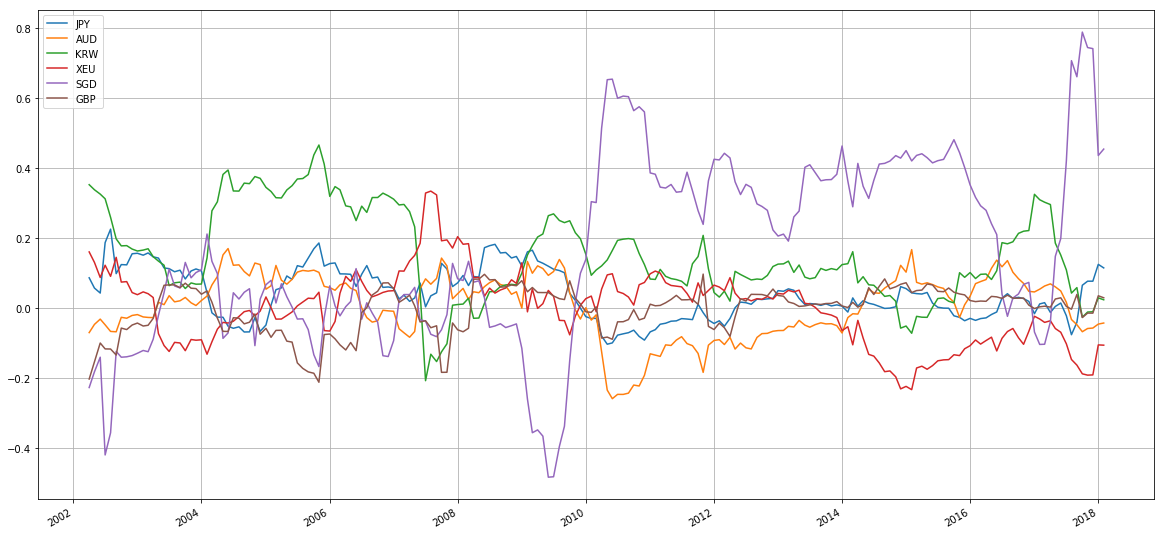

In [45]:
weights = pd.DataFrame(np.array(res[0])/(1+np.array(res[0]).sum(1)).reshape(191, 1), columns=basket.columns, index=basket.index)
weights.plot(figsize=(20, 10), grid=True)

In [71]:
initial_size = 40

r_temp = []
w_temp = []
b_temp = [] 
for step in range(monthly_return.shape[0] - initial_size):    
    batch_return = monthly_return.iloc[:step + initial_size]
    res = model.fit(batch_return[agent._portfolio], batch_return[[agent._target]])
    weight = np.array(res[0])[-1]
    new_state = monthly_return.iloc[step+initial_size]
    proxy = new_state[agent._portfolio]
    target = new_state[agent._target]
    r = agent.reward(target, proxy, weight)
    
    r_temp.append(r)
    w_temp.append(weight)

Using Index(['JPY', 'AUD', 'KRW', 'XEU', 'SGD', 'GBP'], dtype='object') as Basket.
Using Index(['JPY', 'AUD', 'KRW', 'XEU', 'SGD', 'GBP'], dtype='object') as Basket.
Using Index(['JPY', 'AUD', 'KRW', 'XEU', 'SGD', 'GBP'], dtype='object') as Basket.
Using Index(['JPY', 'AUD', 'KRW', 'XEU', 'SGD', 'GBP'], dtype='object') as Basket.
Using Index(['JPY', 'AUD', 'KRW', 'XEU', 'SGD', 'GBP'], dtype='object') as Basket.
Using Index(['JPY', 'AUD', 'KRW', 'XEU', 'SGD', 'GBP'], dtype='object') as Basket.
Using Index(['JPY', 'AUD', 'KRW', 'XEU', 'SGD', 'GBP'], dtype='object') as Basket.
Using Index(['JPY', 'AUD', 'KRW', 'XEU', 'SGD', 'GBP'], dtype='object') as Basket.
Using Index(['JPY', 'AUD', 'KRW', 'XEU', 'SGD', 'GBP'], dtype='object') as Basket.
Using Index(['JPY', 'AUD', 'KRW', 'XEU', 'SGD', 'GBP'], dtype='object') as Basket.
Using Index(['JPY', 'AUD', 'KRW', 'XEU', 'SGD', 'GBP'], dtype='object') as Basket.
Using Index(['JPY', 'AUD', 'KRW', 'XEU', 'SGD', 'GBP'], dtype='object') as Basket.
Usin

Using Index(['JPY', 'AUD', 'KRW', 'XEU', 'SGD', 'GBP'], dtype='object') as Basket.
Using Index(['JPY', 'AUD', 'KRW', 'XEU', 'SGD', 'GBP'], dtype='object') as Basket.
Using Index(['JPY', 'AUD', 'KRW', 'XEU', 'SGD', 'GBP'], dtype='object') as Basket.
Using Index(['JPY', 'AUD', 'KRW', 'XEU', 'SGD', 'GBP'], dtype='object') as Basket.
Using Index(['JPY', 'AUD', 'KRW', 'XEU', 'SGD', 'GBP'], dtype='object') as Basket.
Using Index(['JPY', 'AUD', 'KRW', 'XEU', 'SGD', 'GBP'], dtype='object') as Basket.
Using Index(['JPY', 'AUD', 'KRW', 'XEU', 'SGD', 'GBP'], dtype='object') as Basket.
Using Index(['JPY', 'AUD', 'KRW', 'XEU', 'SGD', 'GBP'], dtype='object') as Basket.
Using Index(['JPY', 'AUD', 'KRW', 'XEU', 'SGD', 'GBP'], dtype='object') as Basket.
Using Index(['JPY', 'AUD', 'KRW', 'XEU', 'SGD', 'GBP'], dtype='object') as Basket.
Using Index(['JPY', 'AUD', 'KRW', 'XEU', 'SGD', 'GBP'], dtype='object') as Basket.
Using Index(['JPY', 'AUD', 'KRW', 'XEU', 'SGD', 'GBP'], dtype='object') as Basket.
Usin

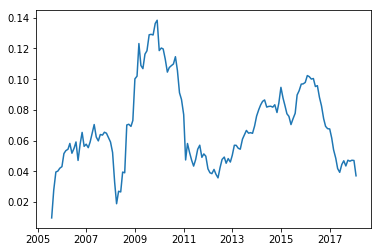

In [75]:
plt.plot(monthly_return.iloc[initial_size:].index.tolist(), np.cumsum(r_temp))

Time-series expection estimation
===
1. find out the suitable time series model
    - ARMA(p, q)
    - VARMA(p, q)

In [19]:
weekly_return = daily_return.resample("W").sum() # end of week
weekly_return = weekly_return[weekly_return.index >= pd.to_datetime("2000-01-01")]

In [25]:
from scipy.linalg import eig

In [36]:
corr_200w = weekly_return.rolling(200).corr()

In [60]:
corr_200w.index.levels[0][corr_200w.index.labels[0][200]]

Timestamp('2000-07-16 00:00:00')

In [78]:
corr_200w[corr_200w.index.labels[0] == 200]

USD       JPY       AUD       KRW       XEU       SGD  \
Date                                                                         
2003-11-02 USD  1.000000  0.274340 -0.236970  0.550322 -0.291344  0.398675   
           JPY  0.274340  1.000000 -0.208421  0.508327 -0.302864  0.481919   
           AUD -0.236970 -0.208421  1.000000 -0.261361  0.524129 -0.368810   
           KRW  0.550322  0.508327 -0.261361  1.000000 -0.162786  0.463891   
           XEU -0.291344 -0.302864  0.524129 -0.162786  1.000000 -0.495863   
           SGD  0.398675  0.481919 -0.368810  0.463891 -0.495863  1.000000   
           GBP -0.189012 -0.283363  0.411381 -0.131304  0.679154 -0.364383   

                     GBP  
Date                      
2003-11-02 USD -0.189012  
           JPY -0.283363  
           AUD  0.411381  
           KRW -0.131304  
           XEU  0.679154  
           SGD -0.364383  
           GBP  1.000000

In [104]:
omega = corr_200w[corr_200w.index.labels[0] == 200]
w, vr = eig(corr_200w[corr_200w.index.labels[0] == 200])

In [62]:
# Risk-off
weekly_return.loc[corr_200w.index.levels[0][corr_200w.index.labels[0][200]]]

USD    0.001167
JPY    0.004359
AUD   -0.009080
KRW   -0.003881
XEU   -0.015174
SGD    0.004720
GBP   -0.008663
Name: 2000-07-16 00:00:00, dtype: float64

In [80]:
vr

array([[-0.34041901,  0.36752369, -0.58772558, -0.23745306, -0.38219018,
         0.44135189, -0.07984419],
       [-0.36088726,  0.27758214,  0.68001203, -0.11038897, -0.46502537,
        -0.11958004, -0.29590282],
       [ 0.35664217,  0.29304262,  0.37025216,  0.20330987,  0.12553827,
         0.76204585,  0.10971367],
       [-0.35732595,  0.53278   , -0.08119047,  0.3768686 ,  0.59082708,
        -0.15926007, -0.25573696],
       [ 0.41962372,  0.43187581,  0.02089413, -0.72792334,  0.24054604,
        -0.20626744, -0.0817411 ],
       [-0.43370163,  0.09913976,  0.17188262, -0.22095087,  0.17138803,
        -0.00790891,  0.83323159],
       [ 0.36717658,  0.47095709, -0.13602767,  0.41155048, -0.43082401,
        -0.37712421,  0.35731143]])

In [108]:
omega

USD       JPY       AUD       KRW       XEU       SGD  \
Date                                                                         
2003-11-02 USD  1.000000  0.274340 -0.236970  0.550322 -0.291344  0.398675   
           JPY  0.274340  1.000000 -0.208421  0.508327 -0.302864  0.481919   
           AUD -0.236970 -0.208421  1.000000 -0.261361  0.524129 -0.368810   
           KRW  0.550322  0.508327 -0.261361  1.000000 -0.162786  0.463891   
           XEU -0.291344 -0.302864  0.524129 -0.162786  1.000000 -0.495863   
           SGD  0.398675  0.481919 -0.368810  0.463891 -0.495863  1.000000   
           GBP -0.189012 -0.283363  0.411381 -0.131304  0.679154 -0.364383   

                     GBP  
Date                      
2003-11-02 USD -0.189012  
           JPY -0.283363  
           AUD  0.411381  
           KRW -0.131304  
           XEU  0.679154  
           SGD -0.364383  
           GBP  1.000000

In [111]:
vr.dot(vr.T).dot(w)

array([3.18767229+0.j, 1.33900912+0.j, 0.75790747+0.j, 0.26243257+0.j,
       0.35242158+0.j, 0.60845473+0.j, 0.49210223+0.j])

In [84]:
print((vr[:, lowest_portfolio]**2).sum())

0.9999999999999998


In [114]:
# the lesat correlated portfolio (assuming all variance is the same)
vr[:, lowest_portfolio].dot(omega).dot(vr[:, lowest_portfolio])

0.26243256832402895

In [121]:
np.ones(7) * (1/(1/w).sum())

array([0.07871803+0.j, 0.07871803+0.j, 0.07871803+0.j, 0.07871803+0.j,
       0.07871803+0.j, 0.07871803+0.j, 0.07871803+0.j])

In [130]:
vr.T.dot(np.ones(7) * (1/(1/w).sum()))

array([-0.02746404+0.j,  0.19466189+0.j,  0.03448615+0.j, -0.024008  +0.j,
       -0.01178725+0.j,  0.02623334+0.j,  0.04620997+0.j])

In [133]:
vr.T.dot((np.ones(7)/7)).sum()

0.432524031298813

In [148]:
weights = (1/w)/(1/w).sum()

In [157]:
weights.dot(omega).dot(weights)

(0.23022077015459633+0j)

In [164]:
weights

array([0.02469452+0.j, 0.05878827+0.j, 0.10386232+0.j, 0.29995524+0.j,
       0.22336323+0.j, 0.12937368+0.j, 0.15996275+0.j])

In [170]:
# lowest variance principal portfolio
print(weekly_return.columns)
lowest_portfolio = np.argmin(w)
print(np.min(w))
print(vr[:, lowest_portfolio])
print(pd.Series(vr[:, lowest_portfolio], index=weekly_return.columns))

Index(['USD', 'JPY', 'AUD', 'KRW', 'XEU', 'SGD', 'GBP'], dtype='object')
(0.2624325683240287+0j)
[-0.23745306 -0.11038897  0.20330987  0.3768686  -0.72792334 -0.22095087
  0.41155048]
USD   -0.237453
JPY   -0.110389
AUD    0.203310
KRW    0.376869
XEU   -0.727923
SGD   -0.220951
GBP    0.411550
dtype: float64


In [177]:
corr_200w.dropna().apply(lambda x: x, 1)

USD       JPY       AUD       KRW       XEU       SGD  \
Date                                                                         
2003-10-26 USD  1.000000  0.274014 -0.241841  0.541217 -0.287702  0.399401   
           JPY  0.274014  1.000000 -0.208242  0.506640 -0.304210  0.481613   
           AUD -0.241841 -0.208242  1.000000 -0.256648  0.523146 -0.369342   
           KRW  0.541217  0.506640 -0.256648  1.000000 -0.165318  0.461121   
           XEU -0.287702 -0.304210  0.523146 -0.165318  1.000000 -0.497003   
           SGD  0.399401  0.481613 -0.369342  0.461121 -0.497003  1.000000   
           GBP -0.186234 -0.283244  0.409533 -0.132057  0.679992 -0.363889   
2003-11-02 USD  1.000000  0.274340 -0.236970  0.550322 -0.291344  0.398675   
           JPY  0.274340  1.000000 -0.208421  0.508327 -0.302864  0.481919   
           AUD -0.236970 -0.208421  1.000000 -0.261361  0.524129 -0.368810   
           KRW  0.550322  0.508327 -0.261361  1.000000 -0.162786  0.463891   
           XEU -0.291344 -0.302864  0.524129 -0.162786  1.000000 -0.495863   
           SGD  0.398675  0.481919 -0.368810  0.463891 -0.495863  1.000000   
           GBP -0.189012 -0.283363  0.411381 -0.131304  0.679154 -0.364383   
2003-11-09 USD  1.000000  0.322174 -0.243372  0.561002 -0.274462  0.405731   
           JPY  0.322174  1.000000 -0.210009  0.515160 -0.324557  0.490182   
           AUD -0.243372 -0.210009  1.000000 -0.261537  0.522764 -0.368369   
           KRW  0.561002  0.515160 -0.261537  1.000000 -0.157466  0.462745   
           XEU -0.274462 -0.324557  0.522764 -0.157466  1.000000 -0.495582   
           SGD  0.405731  0.490182 -0.368369  0.462745 -0.495582  1.000000   
           GBP -0.162432 -0.309291  0.409623 -0.124748  0.678094 -0.363882   
2003-11-16 USD  1.000000  0.322977 -0.243928  0.561904 -0.274968  0.406522   
           JPY  0.322977  1.000000 -0.219886  0.520484 -0.333722  0.496865   
           AUD -0.243928 -0.219886  1.000000 -0.260247  0.531315 -0.383315   
           KRW  0.561904  0.520484 -0.260247  1.000000 -0.164770  0.472541   
           XEU -0.274968 -0.333722  0.531315 -0.164770  1.000000 -0.505353   
           SGD  0.406522  0.496865 -0.383315  0.472541 -0.505353  1.000000   
           GBP -0.163600 -0.316196  0.415572 -0.128860  0.681860 -0.373094   
2003-11-23 USD  1.000000  0.322807 -0.244391  0.559902 -0.275876  0.406939   
           JPY  0.322807  1.000000 -0.220954  0.522334 -0.335844  0.497963   
...                  ...       ...       ...       ...       ...       ...   
2018-03-18 SGD  0.681563  0.462776 -0.714333  0.736091 -0.667497  1.000000   
           GBP -0.367458 -0.135938  0.399017 -0.344456  0.554989 -0.506489   
2018-03-25 USD  1.000000  0.235611 -0.577947  0.696991 -0.328592  0.680763   
           JPY  0.235611  1.000000 -0.252115  0.253887 -0.404817  0.461895   
           AUD -0.577947 -0.252115  1.000000 -0.624748  0.457229 -0.716420   
           KRW  0.696991  0.253887 -0.624748  1.000000 -0.391239  0.735360   
           XEU -0.328592 -0.404817  0.457229 -0.391239  1.000000 -0.667600   
           SGD  0.680763  0.461895 -0.716420  0.735360 -0.667600  1.000000   
           GBP -0.368047 -0.138310  0.398394 -0.338106  0.555152 -0.504196   
2018-04-01 USD  1.000000  0.233589 -0.576455  0.694620 -0.328997  0.681653   
           JPY  0.233589  1.000000 -0.251836  0.245427 -0.404147  0.458296   
           AUD -0.576455 -0.251836  1.000000 -0.619558  0.457829 -0.716171   
           KRW  0.694620  0.245427 -0.619558  1.000000 -0.389191  0.735197   
           XEU -0.328997 -0.404147  0.457829 -0.389191  1.000000 -0.667039   
           SGD  0.681653  0.458296 -0.716171  0.735197 -0.667039  1.000000   
           GBP -0.370044 -0.139518  0.400948 -0.335724  0.555371 -0.503408   
2018-04-08 USD  1.000000  0.233647 -0.577053  0.694691 -0.329477  0.681394   
           JPY  0.233647  1.000000 -0.252804  0.247249 -0.406076  0.460670   
           AUD -0.577053 -0.252804  1.00000

In [200]:
corrs[corrs.index.labels[0] == 200]

USD       JPY       AUD       KRW       XEU       SGD  \
Date                                                                         
2003-11-02 USD  1.000000  0.274340 -0.236970  0.550322 -0.291344  0.398675   
           JPY  0.274340  1.000000 -0.208421  0.508327 -0.302864  0.481919   
           AUD -0.236970 -0.208421  1.000000 -0.261361  0.524129 -0.368810   
           KRW  0.550322  0.508327 -0.261361  1.000000 -0.162786  0.463891   
           XEU -0.291344 -0.302864  0.524129 -0.162786  1.000000 -0.495863   
           SGD  0.398675  0.481919 -0.368810  0.463891 -0.495863  1.000000   
           GBP -0.189012 -0.283363  0.411381 -0.131304  0.679154 -0.364383   

                     GBP  
Date                      
2003-11-02 USD -0.189012  
           JPY -0.283363  
           AUD  0.411381  
           KRW -0.131304  
           XEU  0.679154  
           SGD -0.364383  
           GBP  1.000000

In [218]:
corrs = corr_200w.dropna()
eigens = []
for i in corrs.index.labels[0]:
    w, vr = eig(corrs.loc[corrs.index.levels[0][i]])
    weights = (1/w)/(1/w).sum()
    eigens.append(weights)

In [219]:
np.array(eigens).astype(np.float64)

C:\Users\i6800309\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


array([[0.02490527, 0.0593996 , 0.10436246, ..., 0.22132907, 0.13109394,
        0.16098505],
       [0.02490527, 0.0593996 , 0.10436246, ..., 0.22132907, 0.13109394,
        0.16098505],
       [0.02490527, 0.0593996 , 0.10436246, ..., 0.22132907, 0.13109394,
        0.16098505],
       ...,
       [0.01456205, 0.05740696, 0.06606926, ..., 0.20044617, 0.12650494,
        0.15440142],
       [0.01456205, 0.05740696, 0.06606926, ..., 0.20044617, 0.12650494,
        0.15440142],
       [0.01456205, 0.05740696, 0.06606926, ..., 0.20044617, 0.12650494,
        0.15440142]])

C:\Users\i6800309\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


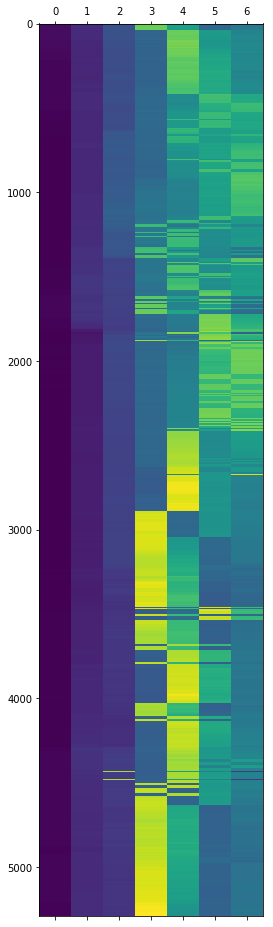

In [220]:
import matplotlib.pyplot as plt
plt.matshow(np.array(eigens).astype(np.float64), fignum=100)
plt.gca().set_aspect('auto')

In [221]:
import pickle as pkl
with open("./current_model/currnet_mv_all_cov.mat.pkl", "rb") as f:
    current_model = pkl.load(f)

In [222]:
current_model

{'mv0': {datetime.datetime(1999, 1, 1, 0, 0): array([[8.837048, -1.3817168, 2.083208, -0.10636218, 0.66915143,
          0.48508253, 0.66968876],
         [-1.3817168, 3.378397, -0.40437946, 1.7603991, -0.50396327,
          1.1467019, 0.41506245],
         [2.083208, -0.40437946, 3.5271662, 1.3707264, 1.7731837,
          0.74048079, 0.99982456],
         [-0.10636218, 1.7603991, 1.3707264, 2.8299985, 0.78606665,
          1.0629009, 0.71091276],
         [0.66915143, -0.50396327, 1.7731837, 0.78606665, 1.4559176,
          0.19016617, 0.50723541],
         [0.48508253, 1.1467019, 0.74048079, 1.0629009, 0.19016617,
          1.2508619, 0.47534656],
         [0.66968876, 0.41506245, 0.99982456, 0.71091276, 0.50723541,
          0.47534656, 0.57658437]], dtype=object),
  datetime.datetime(1999, 1, 8, 0, 0): array([[9.8753616, -0.1057876, 5.1786418, 0.46274002, 1.0608927,
          0.75792293, 0.79834581],
         [-0.1057876, 3.4165754, -0.072319566, 1.2869222, -0.43080174,
          1

In [225]:
dates = []
for model in current_model.keys():
    dates.append(list(current_model[model].keys()))

In [264]:
from functools import reduce
all_date = np.sort(list(set(reduce(lambda x, y: x+y, dates))))

In [267]:
len(all_date)

5074

In [233]:
all_current_mv_cov = {}
for model in current_model.keys():
    all_current_mv_cov.update(current_model[model])

In [268]:
sorted_mv_corr = []
for date in all_date:
    cov = all_current_mv_cov[date]
    sigma_inv = np.diag(1./np.sqrt(np.diag(all_current_mv_cov[date].astype(np.float64))))
    corr = sigma_inv.dot(cov).dot(sigma_inv)
    sorted_mv_corr.append(corr)

In [269]:
np.sqrt(np.diag(list(all_current_mv_cov.values())[0]).astype(np.float64))

array([2.97271728, 1.83804162, 1.87807513, 1.68225994, 1.20661411,
       1.11841938, 0.75933153])

In [271]:
corrs = sorted_mv_corr
eigens_mv = []
for i in range(len(sorted_mv_corr)):
    w, vr = eig(sorted_mv_corr[i].astype(np.float64))
    weights = (1/w)/(1/w).sum()
    eigens_mv.append(weights)

In [274]:
eigens

[array([0.02490527+0.j, 0.0593996 +0.j, 0.10436246+0.j, 0.29792461+0.j,
        0.22132907+0.j, 0.13109394+0.j, 0.16098505+0.j]),
 array([0.02490527+0.j, 0.0593996 +0.j, 0.10436246+0.j, 0.29792461+0.j,
        0.22132907+0.j, 0.13109394+0.j, 0.16098505+0.j]),
 array([0.02490527+0.j, 0.0593996 +0.j, 0.10436246+0.j, 0.29792461+0.j,
        0.22132907+0.j, 0.13109394+0.j, 0.16098505+0.j]),
 array([0.02490527+0.j, 0.0593996 +0.j, 0.10436246+0.j, 0.29792461+0.j,
        0.22132907+0.j, 0.13109394+0.j, 0.16098505+0.j]),
 array([0.02490527+0.j, 0.0593996 +0.j, 0.10436246+0.j, 0.29792461+0.j,
        0.22132907+0.j, 0.13109394+0.j, 0.16098505+0.j]),
 array([0.02490527+0.j, 0.0593996 +0.j, 0.10436246+0.j, 0.29792461+0.j,
        0.22132907+0.j, 0.13109394+0.j, 0.16098505+0.j]),
 array([0.02490527+0.j, 0.0593996 +0.j, 0.10436246+0.j, 0.29792461+0.j,
        0.22132907+0.j, 0.13109394+0.j, 0.16098505+0.j]),
 array([0.02469452+0.j, 0.05878827+0.j, 0.10386232+0.j, 0.29995524+0.j,
        0.22336323

In [279]:
np.array(eigens).astype(np.float64).std(0)

C:\Users\i6800309\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


array([0.00258442, 0.00820185, 0.02095485, 0.10068243, 0.06869017,
       0.05540276, 0.04885713])

In [277]:
np.array(eigens_mv).astype(np.float64).std(0)

C:\Users\i6800309\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


array([0.03543998, 0.12506211, 0.20439049, 0.23468345, 0.2245545 ,
       0.20035244, 0.16301795])

C:\Users\i6800309\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


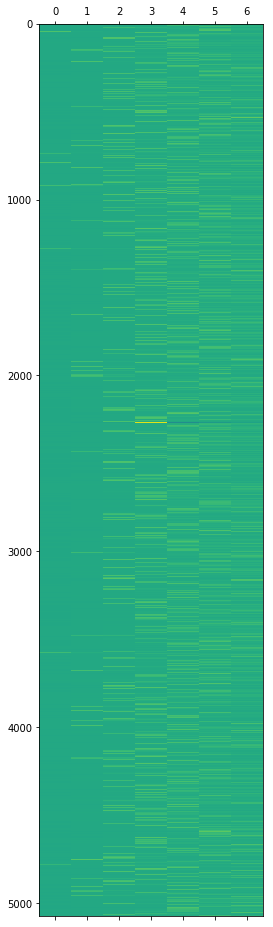

In [272]:
import matplotlib.pyplot as plt
plt.matshow(np.array(eigens_mv).astype(np.float64), fignum=100)
plt.gca().set_aspect('auto')